In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
gbd = pd.read_csv("../../Data/Refined/1021/tuberculosis_incidence_rate.csv")

clean = gbd.copy()

gbd[gbd["Value"] > 200].style


,Measure,Country Name,Disease,Metric,Year,Value,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"Compulsory education, duration (years)",GDP (current US$),GDP per capita (constant 2015 US$),Gini index,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Renewable electricity output (% of total electricity output),Surface area (sq. km),"Unemployment, total (% of total labor force) (national estimate)",Total area (Square Km),PM10_ConcentrationAvg,PM25_ConcentrationAvg,NO2_ConcentrationAvg,Greenhouse gases (Kg CO2-equivalent Per Person),Sulphur oxides (tonnes),Total sales of agricultural pesticides (tonnes),Share of population who are daily smokers (Pct population),u10,v10,d2m,t2m,sst,sp,skt,blh
0,Incidence,Indonesia,Tuberculosis,Rate,2015,207.254239,IDN,67.3,97.500000,1.95725313176892,9,860854232686.213989,3288.222697,38.2,69.520000,22.300000,72.9895935526156,261799249,11.2,14.394437226477,1913580.000000,4.514,1913580.000000,nan,31.486000,nan,3.153344,nan,1597.000000,32.000000,-0.863115,-0.088605,295.365091,299.151850,34.769472,98382.595504,299.107296,457.207445
472,Incidence,South Africa,Tuberculosis,Rate,2010,519.695964,ZAF,77.1,82.800000,8.87081322765791,9,417363822801.713013,5953.945065,63.4,58.886000,35.400000,68.1840155796529,52344051,53.2,1.9412714126679,1219090.000000,24.683,1219090.000000,52.183000,34.696250,38.108750,nan,nan,nan,21.000000,-2.490152,0.433999,289.385429,293.873374,295.162056,101834.608127,294.969406,877.763949
473,Incidence,South Africa,Tuberculosis,Rate,2012,517.225091,ZAF,80,85.200000,8.56950729034559,9,434400545085.810974,6121.557839,..,61.737000,33.000000,69.8367637621794,53782567,..,1.80764503584459,1219090.000000,24.727,1219090.000000,53.390000,35.168750,22.980000,nan,nan,26857.000000,nan,-1.512105,0.577291,288.296209,293.084033,294.555824,101620.586025,294.356847,930.799283
474,Incidence,South Africa,Tuberculosis,Rate,2013,514.592260,ZAF,81.4,85.200000,8.64586417062513,9,400886013595.572998,6170.876709,..,62.388000,32.000000,70.651821622223,54678791,..,1.73565741019162,1219090.000000,24.561,1219090.000000,44.079400,25.189857,29.064429,nan,nan,26857.000000,nan,-2.180683,0.126489,289.106310,293.651282,294.954205,101708.387877,294.767694,899.157129
475,Incidence,South Africa,Tuberculosis,Rate,2014,510.753564,ZAF,82.8,85.900000,8.70671122380103,9,381198869776.106018,6155.005895,63,63.184000,30.900000,71.4594340460674,55594838,55.5,2.14258565670803,1219090.000000,24.89,1219090.000000,46.687632,25.516600,25.606667,9.387836,nan,26857.000000,nan,-1.061715,0.399279,288.620852,293.308418,294.702292,101578.422293,294.509619,915.092310
476,Incidence,South Africa,Tuberculosis,Rate,2015,504.679934,ZAF,83.8,85.300000,8.11041631624629,9,346709790458.562988,6112.273825,..,64.053000,29.700000,72.2593538106544,56723537,..,2.67115419278604,1219090.000000,25.149,1219090.000000,35.330667,19.362375,23.500222,9.035033,nan,26857.000000,20.600000,-0.984680,0.967745,287.861933,292.665907,294.159114,101566.703770,293.958624,932.236948
477,Incidence,South Africa,Tuberculosis,Rate,2016,492.892902,ZAF,84.9,83.900000,8.04226005893759,9,323585509674.481018,6095.295060,..,64.749000,28.400000,73.0514660605434,57259551,..,3.10190031929162,1219090.000000,26.537,1219090.000000,44.231727,22.854125,29.661333,8.874290,nan,26857.000000,nan,-1.488184,0.788075,288.594761,293.186476,294.473249,101661.938961,294.282021,878.503520
478,Incidence,South Africa,Tuberculosis,Rate,2017,475.207386,ZAF,85.8,84.400000,8.15147357441279,9,381448814653.455994,6125.692051,..,65.422000,27.300000,73.8356009676614,57635162,..,4.18104603855229,1219090.000000,27.035,1219090.000000,31.283000,15.886000,20.182500,8.678108,nan,268

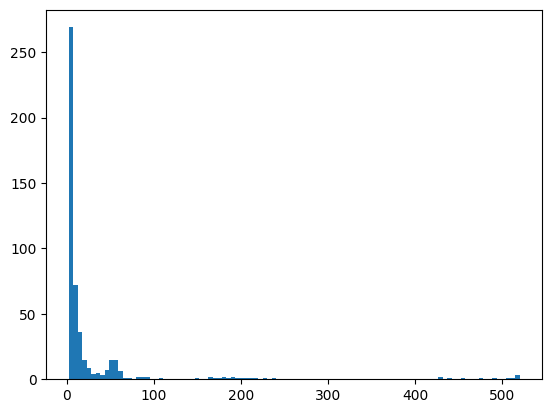

In [140]:
plt.figure()
plt.hist(clean["Value"], bins=100)
plt.show()

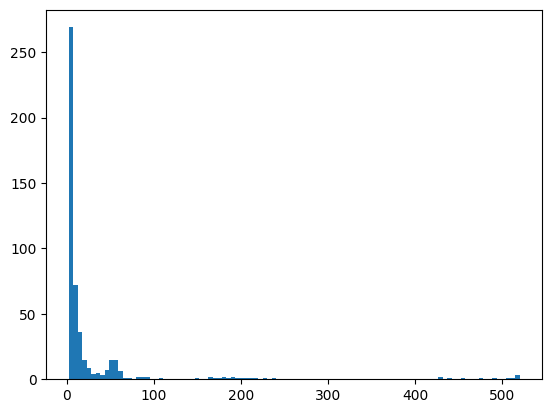

In [141]:
# clean = clean[clean["Value"] > 10]

plt.figure()
plt.hist(clean["Value"], bins=100)
plt.show()

In [ ]:
high_mask = clean[(clean["Country Name"] == "South Africa") | (clean["Country Name"] == "India") | (clean["Country Name"] == "Indonesia")].index.values 
not_high_mask = np.setdiff1d(clean.index.values, high_mask)

clean = clean.select_dtypes(["float", "int"])

clean.columns

Index(['Year', 'Value', 'Access to electricity (% of population)',
       'Compulsory education, duration (years)', 'GDP (current US$)',
       'GDP per capita (constant 2015 US$)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)', 'Population, total',
       'Surface area (sq. km)', 'Total area (Square Km)',
       'PM10_ConcentrationAvg', 'PM25_ConcentrationAvg',
       'NO2_ConcentrationAvg',
       'Greenhouse gases (Kg CO2-equivalent Per Person)',
       'Sulphur oxides (tonnes)',
       'Total sales of agricultural pesticides (tonnes)',
       'Share of population who are daily smokers (Pct population)', 'u10',
       'v10', 'd2m', 't2m', 'sst', 'sp', 'skt', 'blh'],
      dtype='object')

/tmp/ipykernel_8810/1981416874.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


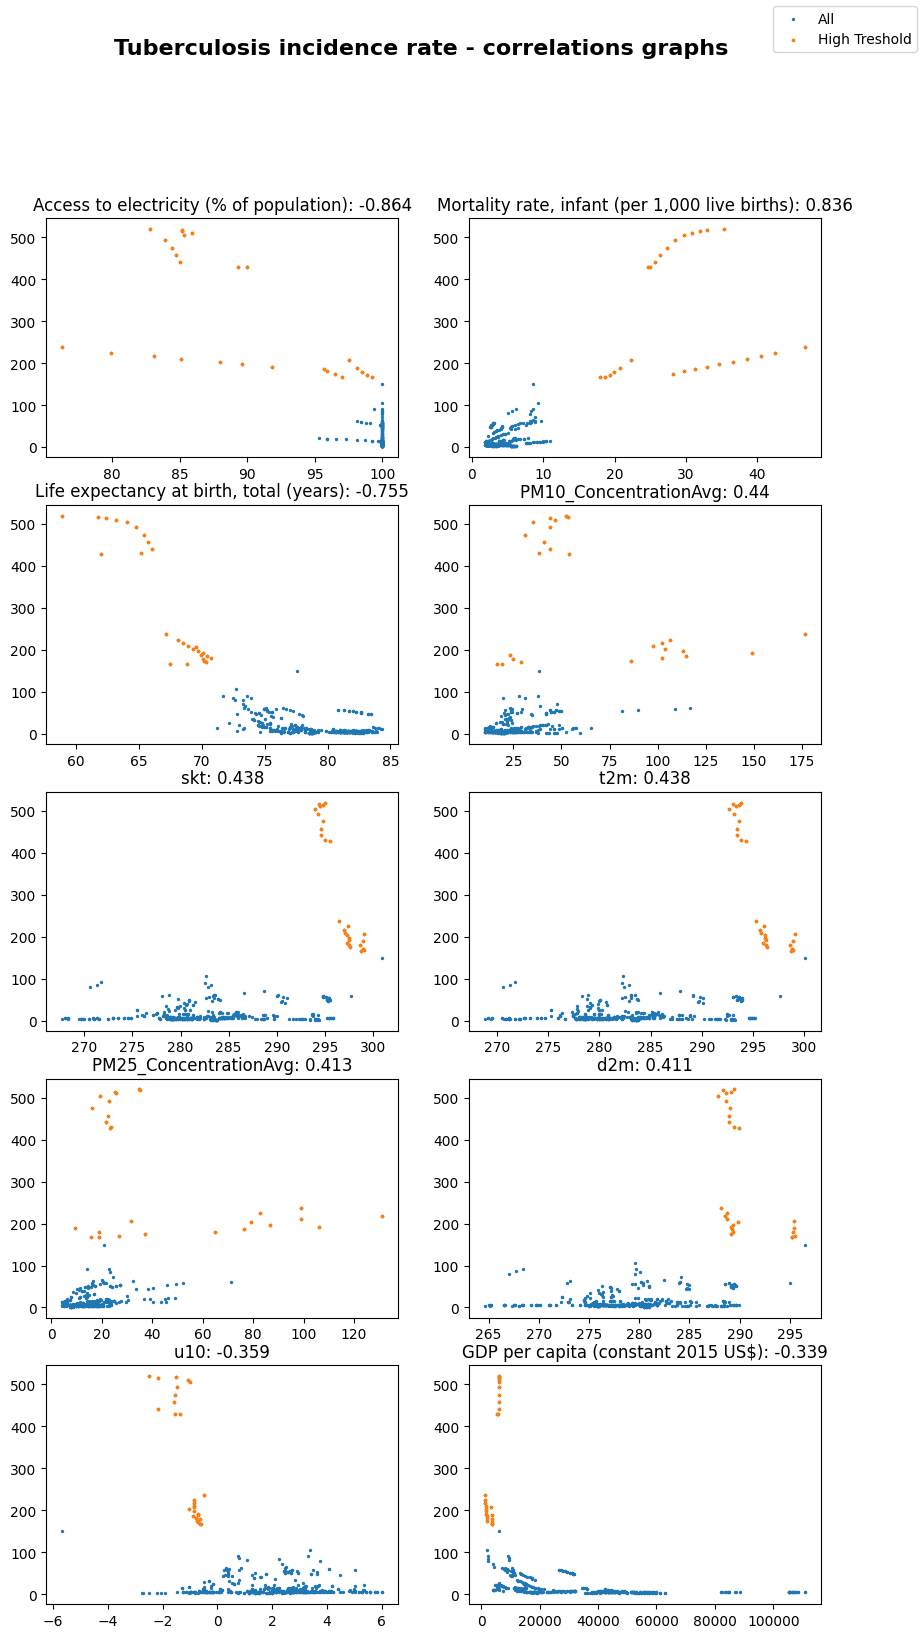

In [ ]:
correlations = clean.corrwith(clean['Value'])

correlations = correlations[2:]

correlations = correlations.sort_values(ascending=False, key=lambda x: abs(x))
# Correlations of more than 0.4 are considered notable.

fig, axes = plt.subplots(5, 2, figsize=(10, 18))
fig.suptitle('Tuberculosis incidence rate - correlations graphs', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.scatter(clean[correlations.index[i]], clean["Value"], s=2)
    ax.scatter(clean.loc[high_mask, correlations.index[i]], clean.loc[high_mask, "Value"], s=3)
    ax.set_title(f"{correlations.index[i]}: {round(correlations.iloc[i], 3)}")

fig.legend(["All", "South Africa, India and Indonesia"])
fig.show()

/tmp/ipykernel_8810/2243138341.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


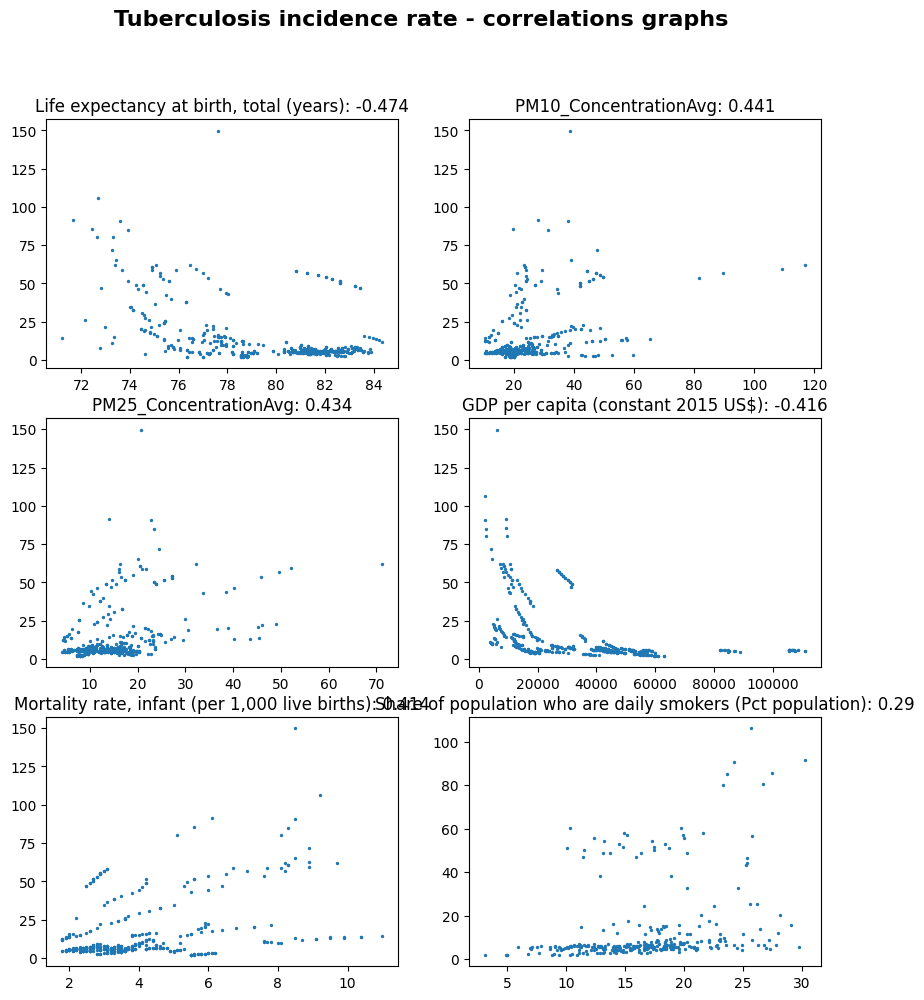

In [145]:
not_high = clean.loc[not_high_mask]

correlations = not_high.corrwith(not_high['Value'])

correlations = correlations[2:]

correlations = correlations.sort_values(ascending=False, key=lambda x: abs(x))

# Correlations of more than 0.4 are considered notable.



fig, axes = plt.subplots(3, 2, figsize=(10, 11))
fig.suptitle('Tuberculosis incidence rate - correlations graphs', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.scatter(not_high[correlations.index[i]], not_high["Value"], s=2)
    ax.set_title(f"{correlations.index[i]}: {round(correlations.iloc[i], 3)}")

fig.show()


/tmp/ipykernel_8810/598719402.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


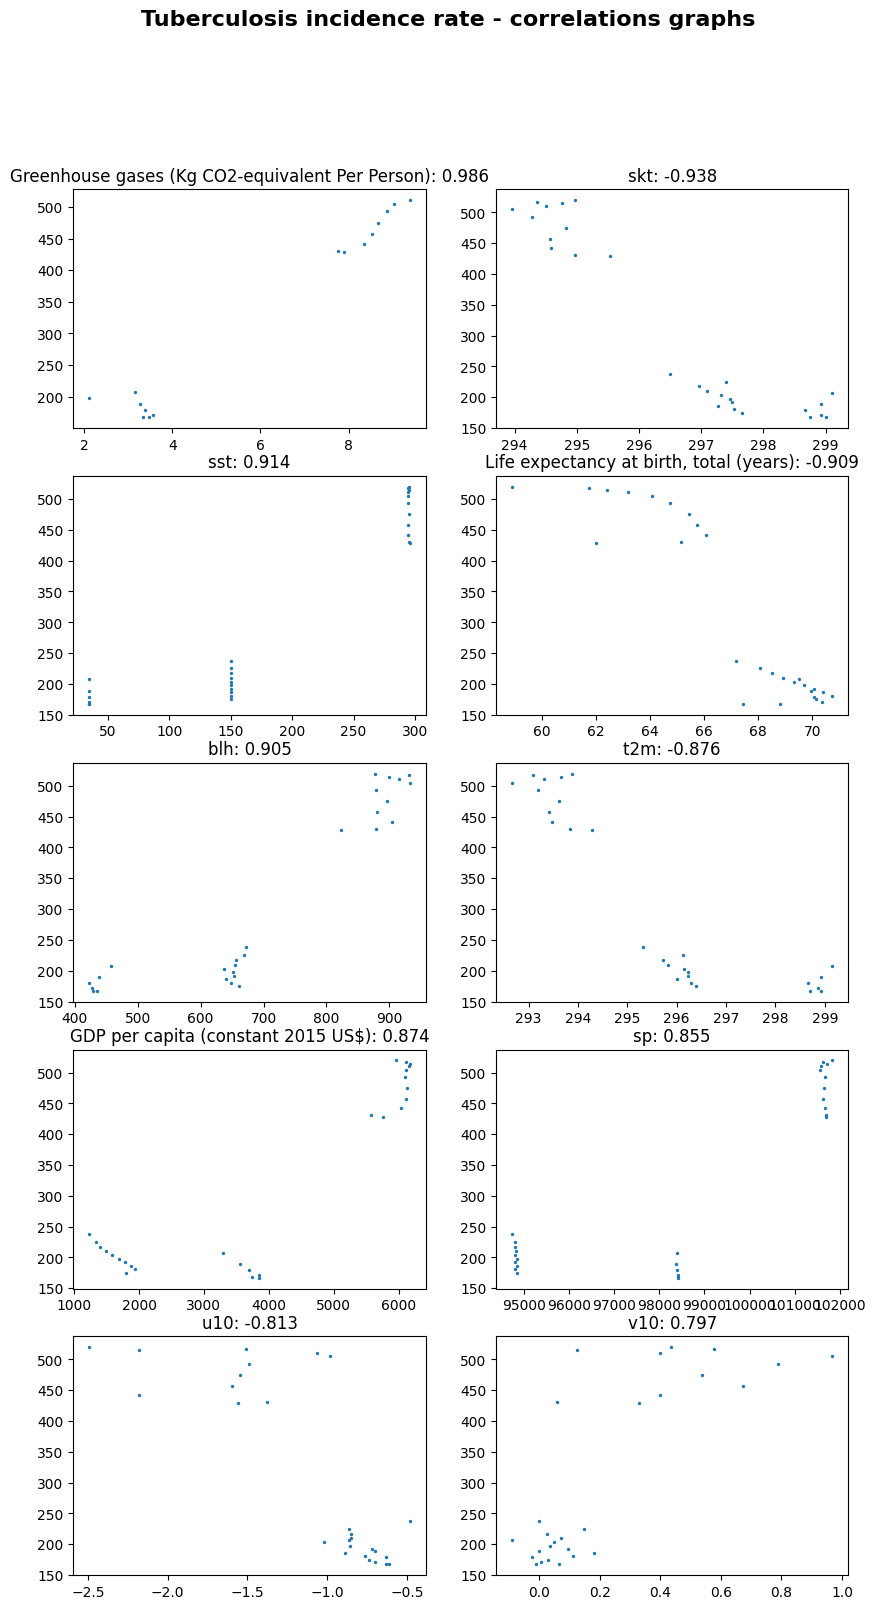

In [146]:
high = clean.loc[high_mask]

correlations = high.corrwith(high['Value'])

correlations = correlations[2:]

correlations = correlations.sort_values(ascending=False, key=lambda x: abs(x))

# Correlations of more than 0.4 are considered notable.



fig, axes = plt.subplots(5, 2, figsize=(10, 18))
fig.suptitle('Tuberculosis incidence rate - correlations graphs', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.scatter(high[correlations.index[i]], high["Value"], s=2)
    ax.set_title(f"{correlations.index[i]}: {round(correlations.iloc[i], 3)}")

fig.show()